#  Import packages 

In [249]:
#Import preprocessing packages
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Import classification packages
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [215]:
#ingore the warnings
warnings.filterwarnings('ignore')

# Exploratory data analysis

In [216]:
# Read CSV data file into DataFrame
df = pd.read_csv("data14.csv", encoding='ISO-8859-1')

In [219]:
# view dimensions of dataset

df.shape

#We can see that there are 5000 instances and 10 variables in the data set.

(5000, 10)

In [218]:
# preview the dataset

df.head()

,Unnamed: 0,ï..UDI,Product.ID,Type,Air.temperature,Process.temperature,Rotational.speed,Torque,Tool.wear,Machine.failure
0,1488,1488,L48667,L,298.2,309.1,1429,48.5,164,0
1,4756,4756,L51935,L,303.4,311.7,1295,51.3,51,1
2,6518,6518,L53697,L,301.1,310.1,1540,36.6,28,0
3,9742,9742,L56921,L,298.9,310.1,1495,42.9,175,0
4,4787,4787,L51966,L,303.8,312.6,1577,41.3,134,0


In [191]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           5000 non-null   int64  
 1   ï..UDI               5000 non-null   int64  
 2   Product.ID           5000 non-null   object 
 3   Type                 5000 non-null   object 
 4   Air.temperature      5000 non-null   float64
 5   Process.temperature  5000 non-null   float64
 6   Rotational.speed     5000 non-null   int64  
 7   Torque               5000 non-null   float64
 8   Tool.wear            5000 non-null   int64  
 9   Machine.failure      5000 non-null   int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 390.8+ KB


### Data preparation - Cleaning step </font>

In [220]:
# Remove irrelevant columns
df = df.drop(["Unnamed: 0","Product.ID","ï..UDI"], axis=1)

In [222]:
## check missing values in dataset
df.isnull().sum()

#There in no missing values in dadaset

Type                   0
Air.temperature        0
Process.temperature    0
Rotational.speed       0
Torque                 0
Tool.wear              0
Machine.failure        0
dtype: int64

In [223]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 1 categorical variables

The categorical variables are : ['Type']


In [225]:
# check frequency distribution of values in Type variable

df.Type.value_counts()

L    3001
M    1500
H     499
Name: Type, dtype: int64

In [226]:
# do One Hot Encoding of Type variable
# preview the dataset with head() method

pd.get_dummies(df.Type,drop_first=True).head()


,L,M
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [197]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['Air.temperature', 'Process.temperature', 'Rotational.speed', 'Torque', 'Tool.wear', 'Machine.failure']


In [198]:
# view summary statistics in numerical variables

print(round(df[numerical].describe()),2)

       Air.temperature  Process.temperature  Rotational.speed  Torque  \
count           5000.0               5000.0            5000.0  5000.0   
mean             300.0                310.0            1539.0    40.0   
std                2.0                  1.0             181.0    10.0   
min              295.0                306.0            1168.0     4.0   
25%              298.0                309.0            1423.0    33.0   
50%              300.0                310.0            1502.0    40.0   
75%              302.0                311.0            1610.0    47.0   
max              304.0                314.0            2886.0    76.0   

       Tool.wear  Machine.failure  
count     5000.0           5000.0  
mean       109.0              0.0  
std         64.0              0.0  
min          0.0              0.0  
25%         55.0              0.0  
50%        109.0              0.0  
75%        163.0              0.0  
max        253.0              1.0   2


Text(0, 0.5, 'Tool.wear')

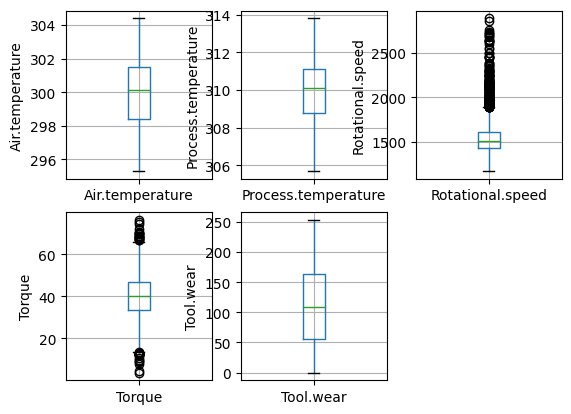

In [199]:
# draw boxplot to visualize outliers

plt.subplot(2, 3, 1)
fig = df.boxplot(column='Air.temperature')
fig.set_title('')
fig.set_ylabel('Air.temperature')


plt.subplot(2, 3, 2)
fig = df.boxplot(column='Process.temperature')
fig.set_title('')
fig.set_ylabel('Process.temperature')


plt.subplot(2, 3, 3)
fig = df.boxplot(column='Rotational.speed')
fig.set_title('')
fig.set_ylabel('Rotational.speed')


plt.subplot(2, 3, 4)
fig = df.boxplot(column='Torque')
fig.set_title('')
fig.set_ylabel('Torque')

plt.subplot(2, 3, 5)
fig = df.boxplot(column='Tool.wear')
fig.set_ylabel('Tool.wear')

In [200]:
# find outliers for Rotational.speed variable

IQR = df["Rotational.speed"].quantile(0.75) - df["Rotational.speed"].quantile(0.25)
Lower_fence = df["Rotational.speed"].quantile(0.25) - (IQR * 3)
Upper_fence = df["Rotational.speed"].quantile(0.75) + (IQR * 3)
print('Rotational.speed outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rotational.speed outliers are values < 862.0 or > 2171.0


In [201]:
# find outliers for Torque variable

IQR = df.Torque.quantile(0.75) - df.Torque.quantile(0.25)
Lower_fence = df.Torque.quantile(0.25) - (IQR * 3)
Upper_fence = df.Torque.quantile(0.75) + (IQR * 3)
print('Rotational.speed outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rotational.speed outliers are values < -6.20000000000001 or > 86.20000000000002


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

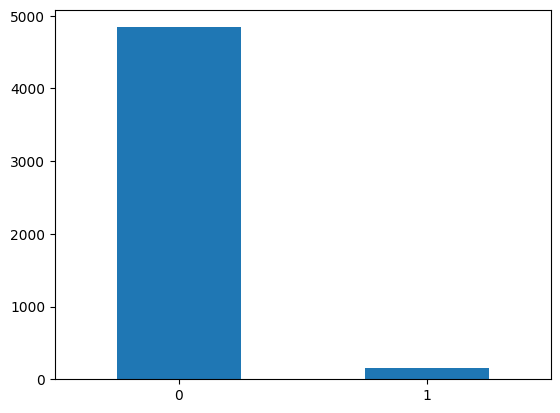

In [202]:
# Data visualization : distribution of the variable "Machine.failure"
ax = df['Machine.failure'].value_counts().plot(kind='bar')
plt.xticks(rotation=360)

In [203]:
# Distribution of the variable "Machine.failure"

print(df['Machine.failure'].value_counts().rename(index = {'0':'not failed :', '1':'failed :'}))

print(f"\nProportion of 0 in the dataset : {round(df['Machine.failure'].value_counts(1)[0]*100, 1)}%")
print(f"Proportion of 1 in the dataset : {round(df['Machine.failure'].value_counts(1)[1]*100, 1)}%")

# We can see that the sample is not balanced

0    4841
1     159
Name: Machine.failure, dtype: int64

Proportion of 0 in the dataset : 96.8%
Proportion of 1 in the dataset : 3.2%


In [227]:
#declare feature vector and target variable
X = df.drop(['Machine.failure'], axis=1)
y = df['Machine.failure']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [228]:
# to balance the sample
# using SMOTE to do oversampling 
X_train = pd.get_dummies(X_train, columns=['Type'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Type'], drop_first=True)

print('Proportional distribution of positive and negative samples in the training set before oversampling:')
print(y_train.value_counts())
print(y_train.value_counts()/len(y_train))

os = SMOTE(random_state=0)
os_data_X, os_data_y = os.fit_resample(X_train, y_train)

os_data_X = pd.DataFrame(data=os_data_X, columns=X_train.columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=['Machine.failure'])

print('-------------------------------------------')
print('Proportional distribution of positive and negative samples in the training set before oversampling:')
print(os_data_y['Machine.failure'].value_counts())
print(os_data_y['Machine.failure'].value_counts()/len(os_data_y))


Proportional distribution of positive and negative samples in the training set before oversampling:
0    3870
1     130
Name: Machine.failure, dtype: int64
0    0.9675
1    0.0325
Name: Machine.failure, dtype: float64
-------------------------------------------
Proportional distribution of positive and negative samples in the training set before oversampling:
0    3870
1    3870
Name: Machine.failure, dtype: int64
0    0.5
1    0.5
Name: Machine.failure, dtype: float64


In [229]:
#Standardization of features

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# Model Building

In [232]:
# Some basic classification algorithms
models = []
models.append(('LR', LogisticRegression(max_iter=1000))) # Logistic regression
models.append(('CART', DecisionTreeClassifier())) # Decision tree
models.append(('NB', GaussianNB())) # Gaussian Naïve Bayes
models.append(('SVM', SVC())) # Support Vector Machine
models.append(('NN', MLPClassifier())) # Neural Network
models.append(('GBM', GradientBoostingClassifier())) # Gradient Boosting
models.append(('RF', RandomForestClassifier())) # Random forest

In [208]:
# Test these learning classifier models in terms of accuracy
scoring = 'accuracy' # Accuracy = (TP+TN)/(P+N)

# Test options for classification
num_folds = 10
seed = 2

# Test different models of classification
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed) # Split the data into 10 equally sized folds
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring) # Evaluate the performance of each model using the accuracy metric
    results.append(cv_results)
    names.append(name)
    msg = "%s : %f (%f)" % (name, cv_results.mean(), cv_results.std()) # Display the name of the model, the mean and standard deviation of the cross-validation results
    print(msg)

LR : 0.970000 (0.006423)
CART : 0.972750 (0.010455)
NB : 0.960250 (0.009114)
SVM : 0.968500 (0.008155)
NN : 0.976500 (0.008529)
GBM : 0.982000 (0.008718)
RF : 0.978500 (0.008000)


In [239]:
# Check for overfitting and underfitting
# print the scores on training and test set
for name,model in models:
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(type(model).__name__)
    print('Training set score: {:.4f}'.format(train_score))
    print('Test set score: {:.4f}'.format(test_score))
    print()

LogisticRegression
Training set score: 0.9705
Test set score: 0.9750

DecisionTreeClassifier
Training set score: 1.0000
Test set score: 0.9750

GaussianNB
Training set score: 0.9607
Test set score: 0.9660

SVC
Training set score: 0.9722
Test set score: 0.9730

MLPClassifier
Training set score: 0.9812
Test set score: 0.9780

GradientBoostingClassifier
Training set score: 0.9932
Test set score: 0.9830

RandomForestClassifier
Training set score: 1.0000
Test set score: 0.9820



The accuracy scores for different classification models are:

*   Logistic Regression (LR): 0.970000 (0.006423)
*   Classification and Regression Trees (CART): 0.972750 (0.010455)
*   Naive Bayes (NB): 0.960250 (0.009114)
*   Support Vector Machines (SVM): 0.968500 (0.008155)
*   Neural Network (NN): 0.976500 (0.008529)
*   Gradient Boosting Machine (GBM): 0.982000 (0.008718)
*   Random Forest (RF): 0.978500 (0.008000)

Based on the accuracy scores, the Gradient Boosting Machine (GBM) has the highest accuracy score of 0.982000, followed by Random Forest (RF) with an accuracy score of 0.978500, and then follow by Neutral Network with an accuracy score of 0.976500 Logistic regression with an accuracy socre of 0.970000.

However, since MLPClassifierGradient Boosting Machine, Random Forest and Neutral Network models are slightly overfitting the data, because the training set score is higher than the test set score.

So, focus on the Logistic regression model.


**Model Evalation**

In [241]:
# Focus one Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [242]:
# Estimate accuracy on validation set
predictions = model.predict(X_test)

print(f"Accuracy : {accuracy_score(y_test, predictions)}")
print("\n")
print(classification_report(y_test, predictions))


Accuracy : 0.975


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       971
           1       0.75      0.21      0.32        29

    accuracy                           0.97      1000
   macro avg       0.86      0.60      0.66      1000
weighted avg       0.97      0.97      0.97      1000



In [243]:
# Confusion matrix
cm = confusion_matrix(y_test, predictions)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[969   2]
 [ 23   6]]

True Positives(TP) =  969

True Negatives(TN) =  6

False Positives(FP) =  2

False Negatives(FN) =  23


<Axes: >

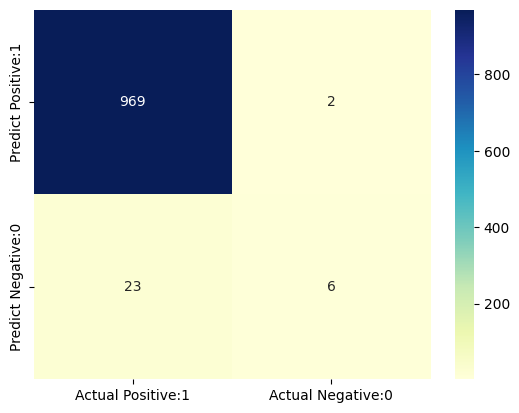

In [244]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:0', 'Actual Negative:1'], 
                                 index=['Predict Positive:0', 'Predict Negative:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Recommendations for machine failure

In [263]:
model = LogisticRegression(max_iter=1000)
model.fit(X,y)
# Get the coefficients of the logistic regression model
coef_df = pd.DataFrame({'variable': X.columns, 'coefficient': model.coef_[0]})

# Print the coefficients
print(coef_df)

              variable  coefficient
0      Air.temperature     0.840894
1  Process.temperature    -0.922225
2     Rotational.speed     0.010641
3               Torque     0.266560
4            Tool.wear     0.014375
5               Type_L     0.220813
6               Type_M    -0.159269


Based on the coefficients, those variables with the largest coefficients are important, like the Air temperature and Process temperature. 
And, the air.temperature correlates positively with machine failure, meaning that the higher the temperature the more likely it is to fail. But, the process.temperature is opposite。